# 가중치 규제
오캄의 면도날 이론 : 어떤 것에 대한 두가지 설명이 있다면, 더 적은 가정이 필요한 간단한 설명이 옳을 것이라는 이론  
과대적합을 완화하기 일반적인 방법은 모델의 복잡도를 줄여 가중치가 작은 값을 가지도록 강제하는 **가중치 규제**가 있음.
L1 규제 : 가중치의 절댓값에 비례하는 비용이 추가됨  
L2 규제 : 가중치의 제곱에 비례하는 비용이 추가됨  

## 영화리뷰 데이터 L2 가중치 규제

In [3]:
from tensorflow.keras.datasets import imdb
(train,train_label),_=imdb.load_data(num_words=10000)

In [ ]:
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential([
    layers.Dense(16,
                kernel_regularizer=regularizers.l2(0.002),
                activation='relu'),
    layers.Dense(16,
                kernel_regularizer=regularizers.l2(0.002),
                activation='relu'),
    layers.Dense(1,
                activation='sigmoid')    
])
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')

In [10]:
import numpy as np
def vectorize(seq,dim=10000):
    res=np.zeros((len(seq),dim))
    for i,sequence in enumerate(seq):
        res[i,sequence]=1.
    return res
train_vec=vectorize(train)

In [28]:
train_vec.shape

(25000, 10000)

In [11]:
his_l2=model.fit(train_vec,train_label,
                epochs=20,
                batch_size=512,
                validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 8s 91ms/step - loss: 0.5773 - accuracy: 0.7890 - val_loss: 0.4421 - val_accuracy: 0.8796
Epoch 2/20
40/40 [==============================] - 1s 29ms/step - loss: 0.3830 - accuracy: 0.8974 - val_loss: 0.3829 - val_accuracy: 0.8802
Epoch 3/20
40/40 [==============================] - 1s 30ms/step - loss: 0.3270 - accuracy: 0.9087 - val_loss: 0.3751 - val_accuracy: 0.8770
Epoch 4/20
40/40 [==============================] - 1s 29ms/step - loss: 0.3038 - accuracy: 0.9165 - val_loss: 0.3489 - val_accuracy: 0.8916
Epoch 5/20
40/40 [==============================] - 1s 32ms/step - loss: 0.2848 - accuracy: 0.9231 - val_loss: 0.3592 - val_accuracy: 0.8862
Epoch 6/20
40/40 [==============================] - 1s 31ms/step - loss: 0.2752 - accuracy: 0.9276 - val_loss: 0.3554 - val_accuracy: 0.8874
Epoch 7/20
40/40 [==============================] - 2s 39ms/step - loss: 0.2692 - accuracy: 0.9293 - val_loss: 0.3515 - val_accuracy: 0.8878
Epoch 8/20
40

In [13]:
import pandas as pd
res=pd.DataFrame(his_l2.history,columns=his_l2.history.keys())
res

,loss,accuracy,val_loss,val_accuracy
0,0.577304,0.78900,0.442118,0.8796
1,0.382962,0.89745,0.382856,0.8802
2,0.326973,0.90870,0.375130,0.8770
3,0.303825,0.91655,0.348882,0.8916
4,0.284757,0.92310,0.359160,0.8862
5,0.275209,0.92755,0.355448,0.8874
6,0.269177,0.92930,0.351532,0.8878
7,0.261282,0.93290,0.387931,0.8752
8,0.257089,0.93460,0.370855,0.8838
9,0.250980,0.93705,0.365067,0.8834


In [17]:
model2=keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')
his=model2.fit(train_vec,train_label,
              epochs=20,
              batch_size=512,
              validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 4s 45ms/step - loss: 0.4966 - accuracy: 0.8040 - val_loss: 0.3695 - val_accuracy: 0.8642
Epoch 2/20
40/40 [==============================] - 1s 28ms/step - loss: 0.2859 - accuracy: 0.9025 - val_loss: 0.3578 - val_accuracy: 0.8524
Epoch 3/20
40/40 [==============================] - 1s 25ms/step - loss: 0.2155 - accuracy: 0.9257 - val_loss: 0.2734 - val_accuracy: 0.8904
Epoch 4/20
40/40 [==============================] - 1s 25ms/step - loss: 0.1741 - accuracy: 0.9392 - val_loss: 0.3104 - val_accuracy: 0.8786
Epoch 5/20
40/40 [==============================] - 1s 28ms/step - loss: 0.1402 - accuracy: 0.9526 - val_loss: 0.3158 - val_accuracy: 0.8826
Epoch 6/20
40/40 [==============================] - 1s 27ms/step - loss: 0.1232 - accuracy: 0.9575 - val_loss: 0.3035 - val_accuracy: 0.8880
Epoch 7/20
40/40 [==============================] - 1s 26ms/step - loss: 0.1060 - accuracy: 0.9651 - val_loss: 0.3250 - val_accuracy: 0.8856
Epoch 8/20
40

In [18]:
res2=pd.DataFrame(his.history,columns=his.history.keys())
res2

,loss,accuracy,val_loss,val_accuracy
0,0.496590,0.80395,0.369459,0.8642
1,0.285916,0.90245,0.357844,0.8524
2,0.215481,0.92570,0.273446,0.8904
3,0.174092,0.93925,0.310429,0.8786
4,0.140219,0.95260,0.315772,0.8826
5,0.123161,0.95755,0.303516,0.8880
6,0.105970,0.96515,0.325021,0.8856
7,0.094097,0.96825,0.357010,0.8792
8,0.078668,0.97595,0.392868,0.8726
9,0.068548,0.97885,0.398064,0.8764


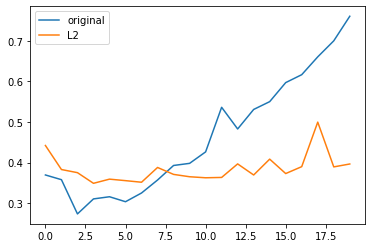

In [19]:
import matplotlib.pyplot as plt
plt.plot(res2.index,res2.val_loss,label='original')
plt.plot(res.index,res.val_loss,label='L2')
plt.legend()

L2규제를 추가한 모델이 과대적합이 더 잘 일어나지 않는 모습을 보임.  
가중치 규제는 일반적으로 작은 모델에서 사용함.  
대규모 모델은 파라미터가 많아져 가중치 규제가 모델 성능에 큰 영향을 끼치지 못함. 

# 드롭 아웃
모델 층에 드롭아웃을 적용시키면 일부 특성의 영향력을 제외시킴.(드롭 아웃 비율은 출력을 0으로 만들 비율)  
[1.0 0.5 1.3 1.1 1.7]에 드롭아웃 비율을 0.4로 설정하면 40%의 특성이 랜덤하게 0으로 바뀜. -> [0 0.5 1.3 0 1.7](일반적으로 0.2~0.5로 설정)  
테스트 단계에서는 드롭아웃을 하지 않고, 드롭아웃 비율만큼 층의 출력을 줄여줌. 훈련 때보다 많은 유닛이 활성화되기 때문.  

In [23]:
model=keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')
his_dropout=model.fit(train_vec,train_label,
         epochs=20,
         batch_size=512,
         validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 8s 140ms/step - loss: 0.6107 - accuracy: 0.6547 - val_loss: 0.4532 - val_accuracy: 0.8620
Epoch 2/20
40/40 [==============================] - 1s 27ms/step - loss: 0.4721 - accuracy: 0.7946 - val_loss: 0.3542 - val_accuracy: 0.8802
Epoch 3/20
40/40 [==============================] - 1s 27ms/step - loss: 0.3852 - accuracy: 0.8498 - val_loss: 0.3109 - val_accuracy: 0.8818
Epoch 4/20
40/40 [==============================] - 1s 28ms/step - loss: 0.3272 - accuracy: 0.8786 - val_loss: 0.2783 - val_accuracy: 0.8918
Epoch 5/20
40/40 [==============================] - 1s 29ms/step - loss: 0.2817 - accuracy: 0.9000 - val_loss: 0.2743 - val_accuracy: 0.8908
Epoch 6/20
40/40 [==============================] - 1s 29ms/step - loss: 0.2438 - accuracy: 0.9155 - val_loss: 0.2887 - val_accuracy: 0.8862
Epoch 7/20
40/40 [==============================] - 1s 27ms/step - loss: 0.2160 - accuracy: 0.9272 - val_loss: 0.2870 - val_accuracy: 0.8934
Epoch 8/20
4

In [24]:
res3=pd.DataFrame(his_dropout.history,columns=his_dropout.history.keys())
res3

,loss,accuracy,val_loss,val_accuracy
0,0.610673,0.65475,0.453215,0.8620
1,0.472099,0.79460,0.354157,0.8802
2,0.385223,0.84980,0.310930,0.8818
3,0.327205,0.87860,0.278322,0.8918
4,0.281673,0.90000,0.274251,0.8908
5,0.243791,0.91555,0.288739,0.8862
6,0.215985,0.92715,0.287043,0.8934
7,0.190680,0.93610,0.301822,0.8940
8,0.174661,0.94290,0.325586,0.8948
9,0.158461,0.94905,0.354068,0.8934


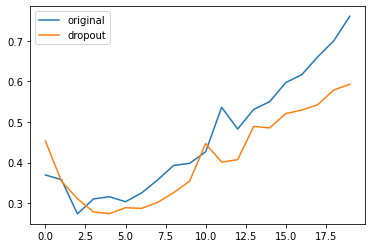

In [26]:
plt.plot(res2.index,res2.val_loss,label='original')
plt.plot(res3.index,res3.val_loss,label='dropout')
plt.legend()

## 정리
### 일반화 성능 극대화 및 과대적합 방지
1. 훈련데이터의 크기를 늘림
2. 더 나은 특성 추출
3. 모델의 용량을 늘림
4. 가중치 규제를 추가
5. 드롭아웃 추가

### 모델에 따른 활성화 및 손실 함수
|문제유형|출력 활성화 함수|손실 함수|
|:------|:---|:---|
|이진 분류|sigmoid|binary_crossentropy|
|단일 레이블 다중 분류|softmax|categorical_crossentropy|
|다중 레이블 다중 분류|sigmoid|binary_crossentropy|